In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

In [2]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix


In [3]:
# Read in your csv file that has the mid features. 

#data = pd.read_csv('../Feature Extraction/midFeaturesTrainSet.csv')
data = pd.read_csv('../Data/Mid_features/midFeaturesTrainFinal2.csv')
print(data.shape)

(4876, 140)


In [4]:
data.head()

,FileID,actorID,Emotion,SentenceID,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
0,1001_DFA_ANG_XX,1001,ANG,DFA,0.121740,0.010421,2.983526,0.216327,0.225219,0.932025,...,0.019988,0.018907,0.020462,0.016111,0.006406,0.007840,0.013986,0.014026,0.003441,0.007750
1,1001_DFA_DIS_XX,1001,DIS,DFA,0.161743,0.006530,2.940205,0.246532,0.212951,1.265724,...,0.021510,0.024405,0.024236,0.024355,0.008880,0.002610,0.004799,0.011605,0.003827,0.010198
2,1001_DFA_FEA_XX,1001,FEA,DFA,0.158708,0.015425,2.973619,0.252136,0.225729,1.245681,...,0.007116,0.003273,0.007960,0.058401,0.010373,0.003830,0.009172,0.025511,0.005837,0.017773
3,1001_DFA_HAP_XX,1001,HAP,DFA,0.159097,0.005760,2.937929,0.229749,0.208469,1.379728,...,0.014083,0.006455,0.007594,0.043598,0.007653,0.011884,0.015029,0.013349,0.014063,0.012297
4,1001_DFA_NEU_XX,1001,NEU,DFA,0.164732,0.008302,2.892321,0.264956,0.227461,1.380184,...,0.024043,0.014561,0.020798,0.051023,0.011482,0.004178,0.002889,0.015255,0.007335,0.016231


In [5]:
# Split the data into train and test set, stratified by Emotion.
data_train, data_test = train_test_split(data.copy(),
                                   shuffle=True,
                                   random_state=608,
                                   stratify=data.Emotion,
                                   test_size=0.2
                                   )

In [6]:
data.sample(5)

,FileID,actorID,Emotion,SentenceID,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
780,1015_TIE_DIS_XX,1015,DIS,TIE,0.151742,0.004375,2.927778,0.251035,0.224441,1.160116,...,0.007577,0.015540,0.013655,0.068021,0.002897,0.021747,0.016803,0.026712,0.006804,0.020892
4748,1090_IEO_NEU_XX,1090,NEU,IEO,0.133987,0.006787,2.672123,0.206392,0.215351,0.711640,...,0.044667,0.028802,0.031107,0.023227,0.004148,0.011496,0.013016,0.011477,0.011048,0.011577
821,1016_ITS_SAD_XX,1016,SAD,ITS,0.204098,0.013971,2.869227,0.273483,0.226497,1.081744,...,0.029132,0.016389,0.010469,0.028944,0.001846,0.003834,0.014885,0.023274,0.015252,0.013665
3547,1069_IOM_FEA_XX,1069,FEA,IOM,0.080903,0.026618,2.933463,0.159018,0.197676,0.419474,...,0.009147,0.019185,0.011186,0.038906,0.005432,0.023143,0.020735,0.013940,0.016373,0.012619
4354,1083_ITH_DIS_XX,1083,DIS,ITH,0.225997,0.005492,2.858010,0.327020,0.251218,1.604868,...,0.023211,0.018193,0.017995,0.022823,0.007690,0.005866,0.011893,0.008649,0.003952,0.009319


In [7]:
# Check the percentages of the different emotion categories in the training set

data_train.Emotion.value_counts(normalize=True)

NEU    0.178718
HAP    0.164359
FEA    0.164359
ANG    0.164359
SAD    0.164103
DIS    0.164103
Name: Emotion, dtype: float64

In [8]:
# Check the percentages of the different emotion categories in the test set

data_test.Emotion.value_counts(normalize=True)

NEU    0.179303
DIS    0.164959
ANG    0.163934
SAD    0.163934
FEA    0.163934
HAP    0.163934
Name: Emotion, dtype: float64

In [9]:
y_train = data_train[['Emotion']]
y_test  = data_test[['Emotion']]

X_train = data_train.drop(columns  = ['FileID','actorID', 'Emotion', 'SentenceID'])
X_test  = data_test.drop(columns   = ['FileID','actorID', 'Emotion', 'SentenceID'])

In [10]:
y_test

,Emotion
2589,DIS
628,DIS
3624,ANG
334,ANG
2033,SAD
...,...
4030,ANG
614,SAD
2150,ANG
4016,NEU


In [11]:
# Add a column to the y vectors encoding each of the emotions.

y_train_dummies = pd.get_dummies(y_train)
y_train         = pd.concat([y_train, y_train_dummies], axis=1)
y_train["Emotion_ALL"]  = 1*y_train["Emotion_NEU"] + 2*y_train["Emotion_ANG"] + 3*y_train["Emotion_HAP"] + 4*y_train["Emotion_SAD"] + 5*y_train["Emotion_FEA"] + 6*y_train["Emotion_DIS"]
y_train = y_train.drop(columns  = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])

y_test_dummies = pd.get_dummies(y_test)
y_test         = pd.concat([y_test, y_test_dummies], axis=1)
y_test["Emotion_ALL"]  = 1*y_test["Emotion_NEU"] + 2*y_test["Emotion_ANG"] + 3*y_test["Emotion_HAP"] + 4*y_test["Emotion_SAD"] + 5*y_test["Emotion_FEA"] + 6*y_test["Emotion_DIS"]
y_test  = y_test.drop(columns   = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


no PCA
confusion matrix for all six emotions of the test set is:
[[85  4 12 29 25 20]
 [20 96 15  3  9 17]
 [29 27 41 11 32 20]
 [33  5  6 58 37 21]
 [21 18 23 30 54 14]
 [32 18 20 20 19 52]]

confusion matrix for all six emotions of the train set is:
[[574  10  18  30  25  40]
 [ 26 541  25   5  10  34]
 [ 53  46 448  22  34  38]
 [ 51  12   7 499  27  44]
 [ 31  29  25  42 489  25]
 [ 54  34  22  39  31 460]]
accuracy = 0.39549180327868855


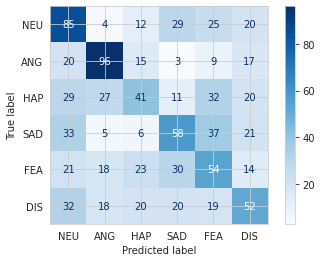

In [12]:
# Build pipeline to first scale the mid feature data, then apply the SVC

pipe100 = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])

classifier100 = pipe100.fit(X_train, y_train)
pred100       = pipe100.predict(X_test)    

# Look at the confusion matrix for the test data :
cnf_matrix_test100 = confusion_matrix(y_test, pred100)

print("no PCA")
print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test100)
print()

# Look at the confusion matrix for the training data:
pred_train100       = pipe100.predict(X_train)
cnf_matrix_train100 = confusion_matrix(y_train, pred_train100)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train100)

class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(classifier100, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

acc100 = np.diag(cnf_matrix_test100).sum()/cnf_matrix_test100.sum() 
print("accuracy =", acc100)




no PCA
confusion matrix for all six emotions of the test set is:
[[83  6 13 26 21 26]
 [17 89 11  2 17 24]
 [26 30 42 15 32 15]
 [31  3  2 67 32 25]
 [17 16 20 25 64 18]
 [35 24 19 23 18 42]]

confusion matrix for all six emotions of the train set is:
[[565  17  18  26  26  45]
 [ 32 517  25   7  19  41]
 [ 46  52 450  23  26  44]
 [ 72   9  11 490  22  36]
 [ 19  28  32  47 490  25]
 [ 55  35  24  38  32 456]]

13


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for PCA n_components = 0.95
confusion matrix for all six emotions of the test set is:
[[76 17 20 28 19 15]
 [19 90 18  7  9 17]
 [34 32 44 13 15 22]
 [45  7  9 60 30  9]
 [23 20 25 20 53 19]
 [35 35 16 25 14 36]]

confusion matrix for all six emotions of the train set is:
[[432  32  66  67  44  56]
 [ 40 453  46  28  28  46]
 [101 118 270  43  56  53]
 [105  26  37 368  58  46]
 [ 72  69  72  73 312  43]
 [108  99  46  74  54 259]]


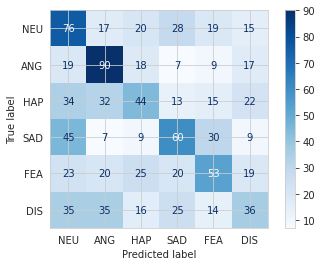

accuracy = 0.367827868852459


In [13]:
X_train_new95 = X_train.copy()
X_test_new95  = X_test.copy()

pca95 = PCA(n_components = .95)
pca95.fit(X_train)

X_train_transform95 = pca95.transform(X_train_new95)
X_test_transform95  = pca95.transform(X_test_new95)

print(len(X_train_transform95[0]))

for i in range (len(X_train_transform95[0])):
    X_train_new95["comp_" + str(i+1)] = X_train_transform95[:,i]
    X_test_new95 ["comp_" + str(i+1)] = X_test_transform95[:,i]

X_train_sub95  = X_train_new95.iloc[: , -(len(X_train_transform95[0])+1):]
X_test_sub95   = X_test_new95.iloc[: , -(len(X_test_transform95[0])+1):]    

# Build pipeline to first scale the mid feature data, then apply the SVC

pipe95 = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])

classifier95 = pipe95.fit(X_train_sub95, y_train)
pred95       = pipe95.predict(X_test_sub95)    

# Look at the confusion matrix for the test data :
cnf_matrix_test95 = confusion_matrix(y_test, pred95)

print("for PCA n_components = 0.95")
print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test95)
print()

# Look at the confusion matrix for the training data:
pred_train95       = pipe95.predict(X_train_sub95)
cnf_matrix_train95 = confusion_matrix(y_train, pred_train95)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train95)

class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(classifier95, X_test_sub95, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

acc95 = np.diag(cnf_matrix_test95).sum()/cnf_matrix_test95.sum() 
print("accuracy =", acc95)

8


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for PCA n_components = 0.9
confusion matrix for all six emotions of the test set is:
[[ 76  18  16  34  20  11]
 [ 20 101  12   8   9  10]
 [ 34  46  33  14  19  14]
 [ 49   7   6  62  28   8]
 [ 28  33  19  27  44   9]
 [ 39  37  11  26  19  29]]

confusion matrix for all six emotions of the train set is:
[[394  50  57  95  47  54]
 [ 61 429  51  26  31  43]
 [129 160 191  57  67  37]
 [135  28  41 351  53  32]
 [ 86  99  67 117 239  33]
 [134 135  51 107  55 158]]


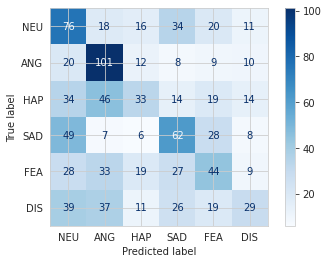

accuracy = 0.35348360655737704


In [14]:
X_train_new90 = X_train.copy()
X_test_new90  = X_test.copy()

pca90 = PCA(n_components = .9)
pca90.fit(X_train)

X_train_transform90 = pca90.transform(X_train_new90)
X_test_transform90  = pca90.transform(X_test_new90)

print(len(X_train_transform90[0]))

for i in range (len(X_train_transform90[0])):
    X_train_new90["comp_" + str(i+1)] = X_train_transform90[:,i]
    X_test_new90 ["comp_" + str(i+1)] = X_test_transform90[:,i]

X_train_sub90  = X_train_new90.iloc[: , -(len(X_train_transform90[0])+1):]
X_test_sub90  = X_test_new90.iloc[: , -(len(X_test_transform90[0])+1):]    

# Build pipeline to first scale the mid feature data, then apply the SVC

pipe90 = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])

classifier90 = pipe90.fit(X_train_sub90, y_train)
pred90       = pipe90.predict(X_test_sub90)    

# Look at the confusion matrix for the test data :
cnf_matrix_test90 = confusion_matrix(y_test, pred90)

print("for PCA n_components = 0.9")
print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test90)
print()

# Look at the confusion matrix for the training data:
pred_train90       = pipe90.predict(X_train_sub90)
cnf_matrix_train90 = confusion_matrix(y_train, pred_train90)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train90)

class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(classifier90, X_test_sub90, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

acc90 = np.diag(cnf_matrix_test90).sum()/cnf_matrix_test90.sum() 
print("accuracy =", acc90)

5


/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for PCA n_components = 0.85
confusion matrix for all six emotions of the test set is:
[[76 32  8 34 19  6]
 [20 89  6 14 11 20]
 [48 50 12 17 22 11]
 [35 18  7 57 37  6]
 [35 42  4 37 37  5]
 [40 51  7 22 19 22]]

confusion matrix for all six emotions of the train set is:
[[328 114  30 109  81  35]
 [ 95 377  22  56  39  52]
 [184 177  69  93  77  41]
 [132  64  23 286  97  38]
 [134 119  21 121 205  41]
 [133 169  24 119  67 128]]


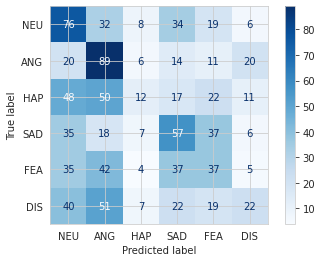

accuracy = 0.30020491803278687


In [15]:
X_train_new85 = X_train.copy()
X_test_new85  = X_test.copy()

pca85 = PCA(n_components = .85)
pca85.fit(X_train)

X_train_transform85 = pca85.transform(X_train_new85)
X_test_transform85  = pca85.transform(X_test_new85)

print(len(X_train_transform85[0]))

for i in range (len(X_train_transform85[0])):
    X_train_new85["comp_" + str(i+1)] = X_train_transform85[:,i]
    X_test_new85 ["comp_" + str(i+1)] = X_test_transform85[:,i]

X_train_sub85  = X_train_new85.iloc[: , -(len(X_train_transform85[0])+1):]
X_test_sub85  = X_test_new85.iloc[: , -(len(X_test_transform85[0])+1):]    

# Build pipeline to first scale the mid feature data, then apply the SVC

pipe85 = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])

classifier85 = pipe85.fit(X_train_sub85, y_train)
pred85       = pipe85.predict(X_test_sub85)    

# Look at the confusion matrix for the test data :
cnf_matrix_test85 = confusion_matrix(y_test, pred85)

print("for PCA n_components = 0.85")
print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test85)
print()

# Look at the confusion matrix for the training data:
pred_train85       = pipe85.predict(X_train_sub85)
cnf_matrix_train85 = confusion_matrix(y_train, pred_train85)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train85)

class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(classifier85, X_test_sub85, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

acc85 = np.diag(cnf_matrix_test85).sum()/cnf_matrix_test85.sum() 
print("accuracy =", acc85)

In [16]:

FP100 = cnf_matrix_test100.sum(axis=0) - np.diag(cnf_matrix_test100) 
FN100 = cnf_matrix_test100.sum(axis=1) - np.diag(cnf_matrix_test100)
TP100 = np.diag(cnf_matrix_test100)
TN100 = cnf_matrix_test100.sum() - (FP100 + FN100 + TP100)


FP95 = cnf_matrix_test95.sum(axis=0) - np.diag(cnf_matrix_test95) 
FN95 = cnf_matrix_test95.sum(axis=1) - np.diag(cnf_matrix_test95)
TP95 = np.diag(cnf_matrix_test95)
TN95 = cnf_matrix_test95.sum() - (FP95 + FN95 + TP95)

FP90 = cnf_matrix_test90.sum(axis=0) - np.diag(cnf_matrix_test90) 
FN90 = cnf_matrix_test90.sum(axis=1) - np.diag(cnf_matrix_test90)
TP90 = np.diag(cnf_matrix_test90)
TN90 = cnf_matrix_test90.sum() - (FP90 + FN90 + TP90)

FP85 = cnf_matrix_test85.sum(axis=0) - np.diag(cnf_matrix_test85) 
FN85 = cnf_matrix_test85.sum(axis=1) - np.diag(cnf_matrix_test85)
TP85 = np.diag(cnf_matrix_test85)
TN85 = cnf_matrix_test85.sum() - (FP85 + FN85 + TP85)

acc100 = np.diag(cnf_matrix_test100).sum()/cnf_matrix_test100.sum() 
acc95 = np.diag(cnf_matrix_test95).sum()/cnf_matrix_test95.sum() 
acc90 = np.diag(cnf_matrix_test90).sum()/cnf_matrix_test90.sum() 
acc85 = np.diag(cnf_matrix_test85).sum()/cnf_matrix_test85.sum() 

recall100 = TP100/(TP100 + FN100)
recall95 = TP95/(TP95 + FN95)
recall90 = TP90/(TP90 + FN90)
recall85 = TP85/(TP85 + FN85)

print("accuracy with 100% variance of data  =", acc100)
print("accuracy with 95% variance of data =", acc95)
print("accuracy with 90% variance of data =", acc90)
print("accuracy with 85% variance of data =", acc85)

print()

print("recall with 100% variance of data  =", recall100)
print("recall with 95% variance of data =",recall95)
print("recall with 90% variance of data =",recall90)
print("recall with 85% variance of data =",recall85)


accuracy with 100% variance of data  = 0.39549180327868855
accuracy with 95% variance of data = 0.367827868852459
accuracy with 90% variance of data = 0.35348360655737704
accuracy with 85% variance of data = 0.30020491803278687

recall with 100% variance of data  = [0.48571429 0.6        0.25625    0.3625     0.3375     0.32298137]
recall with 95% variance of data = [0.43428571 0.5625     0.275      0.375      0.33125    0.22360248]
recall with 90% variance of data = [0.43428571 0.63125    0.20625    0.3875     0.275      0.18012422]
recall with 85% variance of data = [0.43428571 0.55625    0.075      0.35625    0.23125    0.13664596]


In [17]:
test_test_data = pd.read_csv('../Data/Mid_features/midFeaturesTestFinal2.csv')
print(test_test_data.shape)
test_test_data.sample(5)

(1200, 140)


,FileID,actorID,Emotion,SentenceID,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
251,1028_TSI_DIS_XX,1028,DIS,TSI,0.300356,0.016297,2.933247,0.352658,0.227341,1.210277,...,0.009647,0.015832,0.021648,0.035666,0.002722,0.017542,0.008458,0.012536,0.011526,0.011694
129,1013_DFA_DIS_XX,1013,DIS,DFA,0.106144,0.011073,2.758769,0.179656,0.195374,0.595008,...,0.008944,0.048841,0.019122,0.032238,0.002000,0.004884,0.014201,0.014398,0.007772,0.012961
133,1013_DFA_SAD_XX,1013,SAD,DFA,0.050995,0.012283,2.987009,0.156112,0.222526,0.220602,...,0.036252,0.022902,0.010109,0.007289,0.007911,0.005755,0.013020,0.020459,0.005014,0.013393
228,1028_IWW_FEA_XX,1028,FEA,IWW,0.094165,0.034892,2.893622,0.169214,0.189862,0.543087,...,0.013566,0.012771,0.018321,0.022774,0.018166,0.004065,0.014610,0.006259,0.030711,0.015006
590,1040_TSI_SAD_XX,1040,SAD,TSI,0.316559,0.018447,2.834112,0.407056,0.270021,1.398134,...,0.013176,0.005790,0.003135,0.083061,0.001121,0.005984,0.004293,0.024264,0.005534,0.022657


In [18]:
y_test_test = test_test_data[['Emotion']]
X_test_test = test_test_data.drop(columns  = ['FileID','actorID', 'Emotion', 'SentenceID'])


In [19]:
# Add a column to the y vectors encoding each of the emotions.

y_test_test_dummies = pd.get_dummies(y_test_test)
y_test_test         = pd.concat([y_test_test, y_test_test_dummies], axis=1)
y_test_test["Emotion_ALL"]  = 1*y_test_test["Emotion_NEU"] + 2*y_test_test["Emotion_ANG"] + 3*y_test_test["Emotion_HAP"] + 4*y_test_test["Emotion_SAD"] + 5*y_test_test["Emotion_FEA"] + 6*y_test_test["Emotion_DIS"]
y_test_test  = y_test_test.drop(columns   = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])


no PCA
confusion matrix for all six emotions of the test set is:
[[85  4 12 29 25 20]
 [20 96 15  3  9 17]
 [29 27 41 11 32 20]
 [33  5  6 58 37 21]
 [21 18 23 30 54 14]
 [32 18 20 20 19 52]]

accuracy = 0.44583333333333336


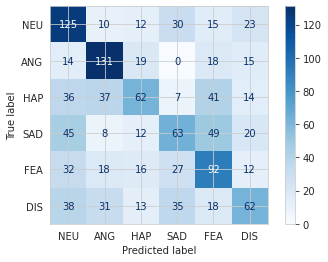

In [20]:
# Build pipeline to first scale the mid feature data, then apply the SVC

pipe_test = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])

pred100_test       = pipe100.predict(X_test_test)    

# Look at the confusion matrix for the test data :
cnf_matrix_test100_test = confusion_matrix(y_test_test, pred100_test)

print("no PCA")
print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test100)
print()


class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
disp = plot_confusion_matrix(classifier100, X_test_test, y_test_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

acc100_test = np.diag(cnf_matrix_test100_test).sum()/cnf_matrix_test100_test.sum() 
print("accuracy =", acc100_test)


In [34]:
recognition_rate = np.array([73, 53, 29, 26, 34, 29])
recognition_rate

array([73, 53, 29, 26, 34, 29])

accuracy with 100% variance of test data  = 0.44583333333333336
recall with 100% variance of test data = [0.58139535 0.66497462 0.31472081 0.31979695 0.46700508 0.31472081]


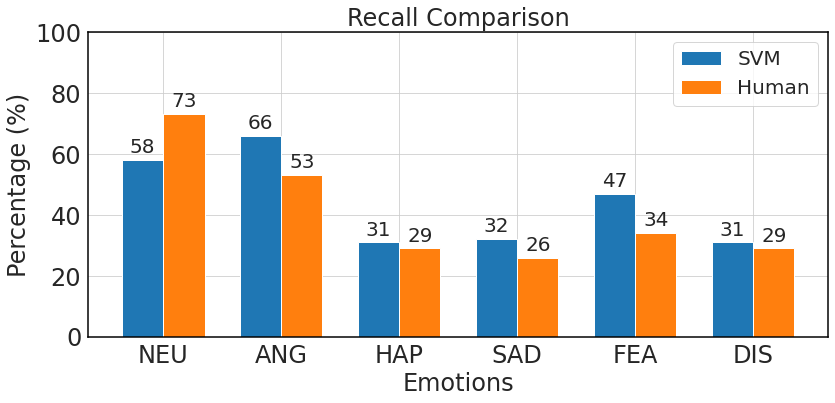

In [46]:
import matplotlib.pyplot as plt
import numpy as np


labels    = ['NEU', 'ANG', 'HAP', 'SAD', 'FEA', 'DIS']

FP100_test = cnf_matrix_test100_test.sum(axis=0) - np.diag(cnf_matrix_test100_test) 
FN100_test = cnf_matrix_test100_test.sum(axis=1) - np.diag(cnf_matrix_test100_test)
TP100_test = np.diag(cnf_matrix_test100_test)
TN100_test = cnf_matrix_test100_test.sum() - (FP100_test + FN100_test + TP100_test)
acc100_test = np.diag(cnf_matrix_test100_test).sum()/cnf_matrix_test100_test.sum() 
recall100_test = TP100_test/(TP100_test + FN100_test)


print("accuracy with 100% variance of test data  =", acc100_test)
print("recall with 100% variance of test data =",recall100_test)

recall_test    = np.round(recall100_test*100)
recogn    = recognition_rate

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))


rects1 = ax.bar(x - width/2, recall_test, width, label='SVM')
rects2 = ax.bar(x + width/2, recogn, width, label='Human')

plt.rcParams['font.size'] = '20'

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
ax.set_title('Recall Comparison')
ax.set_xticks(x, labels)
ax.legend()



ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["axes.edgecolor"] = "black"

plt.xlabel('Emotions')
plt.ylabel('Percentage (%)')

ax.set_ylim([0, 100])


fig.tight_layout()

plt.show()

In [23]:
each_emotion = cnf_matrix_test100_test/cnf_matrix_test100_test.sum(axis=1)
percentage_emotion = each_emotion * 100
percentage_emotion[0]

array([58.13953488,  5.07614213,  6.09137056, 15.2284264 ,  7.6142132 ,
       11.6751269 ])

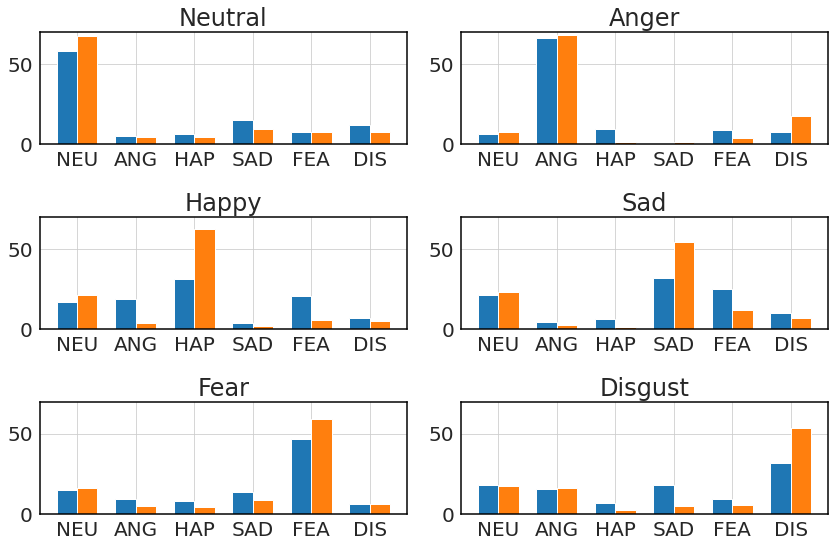

In [47]:
import matplotlib.pyplot as plt
import numpy as np


labels    = ['NEU', 'ANG', 'HAP', 'SAD', 'FEA', 'DIS']
recall_test    = np.round(recall100_test*100)
recogn    = recognition_rate

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(3, 2, figsize=(12, 8))

ax[0, 0].set_title('Neutral')
NEU_rater = [67.2, 4.2, 4.3, 9.2, 7.3, 7.9]
NEU1 = ax[0,0].bar(x - width/2, percentage_emotion[0], width, label='Recall')
NEU2 = ax[0,0].bar(x + width/2, NEU_rater, width, label='Recognition Rate')

ax[0, 1].set_title('Anger')
ANG_rater = [7.9, 68.2, 1.6, 1.1, 3.9, 17.3]  
ANG1 = ax[0,1].bar(x - width/2, percentage_emotion[1], width, label='Recall')
ANG2 = ax[0,1].bar(x + width/2, ANG_rater, width, label='Recognition Rate')

ax[1, 0].set_title('Happy')
HAP_rater = [21.3, 3.7, 62.4, 1.8, 5.8, 4.9]  
HAP1 = ax[1, 0].bar(x - width/2, percentage_emotion[2], width, label='Recall')
HAP2 = ax[1, 0].bar(x + width/2, HAP_rater, width, label='Recognition Rate')

ax[1, 1].set_title('Sad')
SAD_rater = [23, 2.5, 1.5, 54.1, 12.1, 6.8]  
SAD1 = ax[1, 1].bar(x - width/2, percentage_emotion[3], width, label='Recall')
SAD2 = ax[1, 1].bar(x + width/2, SAD_rater, width, label='Recognition Rate')

ax[2, 0].set_title('Fear')
FEA_rater = [16.4, 5, 4.2, 8.8, 59.2, 6.4]  
FEA1 = ax[2, 0].bar(x - width/2, percentage_emotion[4], width, label='Recall')
FEA2 = ax[2, 0].bar(x + width/2, FEA_rater, width, label='Recognition Rate')

ax[2, 1].set_title('Disgust')
DIS_rater = [17.57, 16.3, 2.4, 4.7, 5.5, 53.6]  
DIS1 = ax[2, 1].bar(x - width/2, percentage_emotion[5], width, label='Recall')
DIS2 = ax[2, 1].bar(x + width/2, DIS_rater, width, label='Recognition Rate')


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax[0, 0].set_title('Comparision between SVM prediction results with the experimental data')
ax[0, 0].set_xticks(x, labels)
ax[0, 1].set_xticks(x, labels)
ax[1, 0].set_xticks(x, labels)
ax[1, 1].set_xticks(x, labels)
ax[2, 0].set_xticks(x, labels)
ax[2, 1].set_xticks(x, labels)


ax[0, 0].set_ylim([0, 70])
ax[0, 1].set_ylim([0, 70])
ax[1, 0].set_ylim([0, 70])
ax[1, 1].set_ylim([0, 70])
ax[2, 0].set_ylim([0, 70])
ax[2, 1].set_ylim([0, 70])

#ax[0, 0].legend()




#ax[0, 0].bar_label(rects1, padding=3)
#ax[0, 0].bar_label(rects2, padding=3)


fig.tight_layout()

plt.show()
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['font.size'] = '14'

In [ ]:
ACC